# 1、加载数据

In [1]:
import jieba
import jieba.analyse
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import pandas as pd
data = pd.read_csv('../../data/day10-nlp-data/comment.csv',header=None,names=['id','content','score','datetime'])

In [2]:
data.head(10)

,id,content,score,datetime
0,1087000303,很不错的影片，敬礼祖国，敬礼高,5.0,2019/10/8 21:17
1,1086999524,一个个平凡简单的小故事，加起来，让我满满的感动，,4.5,2019/10/8 21:16
2,1086999517,很喜欢，很感动,5.0,2019/10/8 21:16
3,1086996596,我爱我的祖国，很震撼,5.0,2019/10/8 21:16
4,1086993780,第一段看了有击中泪点的地方，还有女排那集也很好，其他的几集觉得差点差点没有到点。不过还是很值...,5.0,2019/10/8 21:15
5,1087000274,合唱我的祖国,5.0,2019/10/8 21:15
6,1086970474,感动，激动，为伟大的祖国而自豪！,5.0,2019/10/8 21:14
7,1086974279,很棒啦。很有中国的地方特色，很感动。,5.0,2019/10/8 21:14
8,1086998149,国庆必看！！！,5.0,2019/10/8 21:14
9,1086999475,也，在骨。。话剧表演和,0.0,2019/10/8 21:14


# 2、分词

In [3]:
# 全模式 ,把句子中所有的可以成词的词语都扫描出来，速度非常快，但是不能解决歧义;
seg_list = jieba.cut("南京市长江大桥", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  

# 精确模式,试图将句子最精确地切开，适合文本分析;
seg_list = jieba.cut("南京市长江大桥", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  

# 搜索引擎模式,在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。
seg_list = jieba.cut_for_search("南京市长江大桥") 
print(", ".join(seg_list))

# 默认是精确模式
seg_list = jieba.cut("南京市长江大桥")  
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.236 seconds.
Prefix dict has been built succesfully.


Full Mode: 南京/ 南京市/ 京市/ 市长/ 长江/ 长江大桥/ 大桥
Default Mode: 南京市/ 长江大桥
南京, 京市, 南京市, 长江, 大桥, 长江大桥
南京市, 长江大桥


## 2.1 练习：分词

In [4]:
string='为什么我的眼里常含泪水，因为我对这土地爱的深沉！！！！！'
# s = jieba.cut(string)
# result = " ".join(s)
# result= remove_stopwords(result)














In [5]:
def chinese_word_cut(mytext):
    """
    分词
    """
    return  " ".join(jieba.cut(mytext))

In [6]:
data['content'] = data['content'].apply(chinese_word_cut)

## 2.2 句子分词结果

In [7]:
data.head(10)

,id,content,score,datetime
0,1087000303,很 不错 的 影片 ， 敬礼 祖国 ， 敬礼 高,5.0,2019/10/8 21:17
1,1086999524,一个个 平凡 简单 的 小 故事 ， 加 起来 ， 让 我 满满的 感动 ，,4.5,2019/10/8 21:16
2,1086999517,很 喜欢 ， 很 感动,5.0,2019/10/8 21:16
3,1086996596,我 爱 我 的 祖国 ， 很 震撼,5.0,2019/10/8 21:16
4,1086993780,第一段 看 了 有 击中 泪点 的 地方 ， 还有 女排 那集 也 很 好 ， 其他 的 几...,5.0,2019/10/8 21:15
5,1087000274,合唱 我 的 祖国,5.0,2019/10/8 21:15
6,1086970474,感动 ， 激动 ， 为 伟大 的 祖国 而 自豪 ！,5.0,2019/10/8 21:14
7,1086974279,很棒 啦 。 很 有 中国 的 地方 特色 ， 很 感动 。,5.0,2019/10/8 21:14
8,1086998149,国庆 必看 ！ ！ ！,5.0,2019/10/8 21:14
9,1086999475,也 ， 在 骨 。 。 话剧表演 和,0.0,2019/10/8 21:14


# 3.绘制词云图

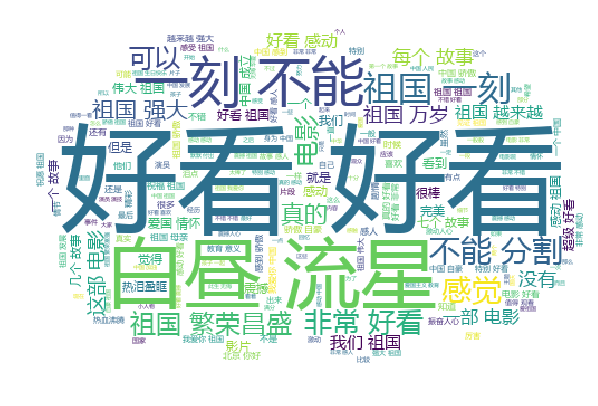

In [8]:

"""
1.以空格进行拼接数据集
"""
comment_after_split = data["content"].tolist()
words = " ".join(comment_after_split)  


"""
2.设置词云图参数：画布宽高、背景颜色、背景图、字体、屏蔽词、最大词的字体大小等
"""
bg_image = plt.imread('Picture/background.jpg')
wc = WordCloud(width= 1000,height=2000,background_color='white',mask=bg_image,font_path='msyh.TTF',
               max_font_size= 400,random_state=50)
wc.generate(words)


"""
3.设置图片格式
"""
plt.figure(figsize=(10,15))
plt.imshow(wc)
plt.axis('off')
plt.show()

"""
4.保存结果到本地
"""
wc.to_file('Picture/词云图——1.jpg')

# 4、去停用词

## 4.1获取停用词列表

In [9]:
def get_stopword_list():
    """
    获取停用词列表
    """
    stop_word_path = '../../data/day10-nlp-data/chineseStopWords.txt'
    stopword_list = [sw.replace('\n', '') for sw in open(stop_word_path, encoding='gb18030').readlines()]
    return stopword_list
stopword_list = get_stopword_list()

## 4.2去除停用词

In [10]:
def remove_stopwords(text):
    """
    去停用词
    """
    mytext = ''
    text= text.split()
    for i,j in enumerate(text):  
        if j not in stopword_list:
            mytext+=j
            if i!=len(text)-1:
                mytext+=' '
    return mytext

In [11]:
data['content'] = data['content'].apply(remove_stopwords)

In [12]:
data.head(10)

,id,content,score,datetime
0,1087000303,不错 敬礼 祖国 敬礼 高,5.0,2019/10/8 21:17
1,1086999524,一个个 平凡 简单 故事 加 满满的 感动,4.5,2019/10/8 21:16
2,1086999517,喜欢 感动,5.0,2019/10/8 21:16
3,1086996596,爱 祖国 震撼,5.0,2019/10/8 21:16
4,1086993780,第一段 击中 泪点 地方 女排 那集 好 几集 差点 差点 点 值得一看 希望 祖国 不忘 ...,5.0,2019/10/8 21:15
5,1087000274,合唱 祖国,5.0,2019/10/8 21:15
6,1086970474,感动 激动 祖国 自豪,5.0,2019/10/8 21:14
7,1086974279,很棒 中国 地方 特色 感动,5.0,2019/10/8 21:14
8,1086998149,国庆 必看,5.0,2019/10/8 21:14
9,1086999475,骨 话剧表演,0.0,2019/10/8 21:14


## 4.3练习：绘制词云图

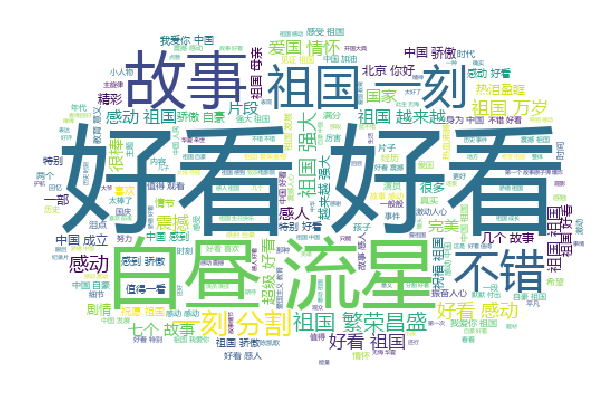

In [13]:
comment_after_split = data["content"].tolist()
words = " ".join(comment_after_split)  # 以空格进行拼接
bg_image = plt.imread('Picture/background.jpg')
wc = WordCloud(width= 1000,height=2000,background_color='white',mask=bg_image,font_path='msyh.TTF',
               max_font_size= 400,random_state=50)

wc.generate(words)
plt.figure(figsize=(10,15))
plt.imshow(wc)
plt.axis('off')
plt.show()
#保存结果到本地
wc.to_file('Picture/词云图——2.jpg')

## 4.4云图STOPWORDS函数库

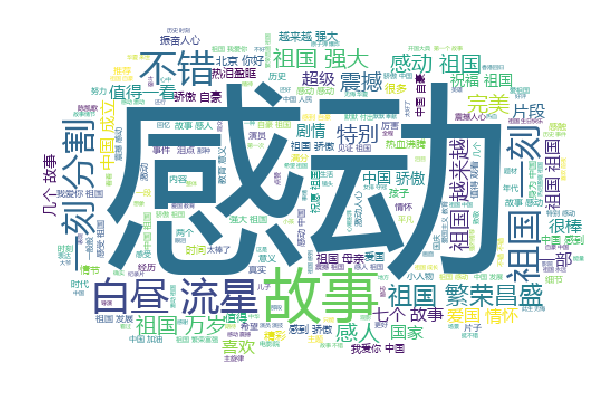

In [14]:
"""
1.以空格进行拼接数据集
"""
comment_after_split = data["content"].tolist()
words = " ".join(comment_after_split)  


"""
2.加载云图停用词库
"""

stopwords = STOPWORDS.copy()
stopwords.update({"电影","最后","就是","不过","这个","一个","感觉","这部","虽然","不是","真的","觉得","还是","但是","影片","感觉","这部","好看","好看好看"})

"""
3.设置词云图参数：
  width,height:画布宽高、
  background_color:背景颜色、
  mask:背景图、
  font_path"字体、
  stopwords:屏蔽词、
  max_font_size:最大词的字体大小等
"""

bg_image = plt.imread('Picture/background.jpg')
wc = WordCloud(width= 1000,height=2000,background_color='white',mask=bg_image,font_path='msyh.TTF',stopwords=stopwords,
               max_font_size= 400,random_state=50)
wc.generate(words)


"""
4.设置图片格式
"""

plt.figure(figsize=(10,15))
plt.imshow(wc)
plt.axis('off')
plt.show()

"""
5.保存结果到本地
"""
wc.to_file('Picture/词云图——3.jpg')

# 5、文本表示 （one-hot）

## 5.1 one-hot编码

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = ['男', '女','中国', '排球','足球', '美国', '篮球', '日本', '羽毛球','乒乓球']

# 编号
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

# 生成二进制编码
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[9, :])])
print(inverted)

[5 2 0 3 9 7 6 4 8 1]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['乒乓球']


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## 5.2 word2vec 向量化

In [ ]:
from gensim.models.word2vec import Word2Vec

"""
1.加载数据
""" 

file1 = open('../../data/day10-nlp-data/corpus1_cut.txt')
file2 = open('../../data/day10-nlp-data/corpus2_cut.txt')
file3 = open('../../data/day10-nlp-data/corpus3_cut.txt')
files = [file1,file2,file3]


"""
2.建立词汇列表
"""
comment=[]
for file in files:
    while True:
        ss=file.readline().replace('\n','').rstrip()
        if ss=='':
            break
        s1=ss.split(" ")
        comment.append(s1)
    file.close()


"""
3. 构建并训练词向量模型，生成词向量为100维，考虑上下5个单词共10个单词，采用sg=1的方法也就是skip-gram
"""
model = Word2Vec(size=100,workers=5,sg=1)  
model.build_vocab(comment) 
model.train(comment,total_examples = model.corpus_count,epochs = model.iter)

"""
4.保存模型
"""
model.save('./model/gensim_w2v_sg0_model')

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


## 5.3练习：word2vec训练模型并保存

In [ ]:
file = open('data/corpus0_cut.txt')











In [ ]:
# 加载模型
model = Word2Vec.load('model/gensim_w2v_sg0_model')
model1 = Word2Vec.load('model/Word60.model') 

In [ ]:
model.wv.vocab.keys()

## 5.4查看词语向量样式

In [ ]:
#查看‘好看’对应的词向量
print(model['好看'])  

In [ ]:
# 输出’强大‘相近的词语和概率
sim_words = model.most_similar(positive=['强大'])
for word,similarity in sim_words:
    print(word,similarity)   

In [ ]:
#similarity两个词语的相似度
y1 = model.similarity("北京", "上海")
print(u"北京和上海的相似度：", y1)

In [ ]:
#‘女人+国王-男人’的结果
result = model.most_similar(positive=[u'女人', u'国王'], negative =[u'男人'])
print(result[0])

In [ ]:
result1 = model1.most_similar(positive=[u'女人', u'国王'], negative =[u'男人'])
print(result1[0])



## 5.5练习：加载模型，查看词语相似度



## 5.6查看词语坐标分布

In [ ]:
from sklearn.decomposition import IncrementalPCA    # 用于最初的降维
from sklearn.manifold import TSNE                   # 用于最终的降维import numpy as np                                  # 用于数组控制
from adjustText import adjust_text
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="msyh.TTF")
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    #用来正常显示负号



def reduce_dimensions(model, plot_in_notebook = False):    
    """
    绘制词汇在二维坐标下的位置
    model:word2vec模型
    
    
    num_dimensions:最终的维度数（2维、3维等）   
    vectors:向量空间中的位置  
    labels:“跟踪”词汇以便稍后再次标记我们的数据
    """
 
    num_dimensions = 2 
    vectors = []         
    labels = []       
    words= ['男人','女人','国王','王后','北京','上海']
    for word in words:
        vectors.append(model.wv[word])
        labels.append(word)
    vectors = np.asarray(vectors)    
    labels = np.asarray(labels)  
    
    """
    TSNE降维：
        n_components：int，可选（默认值：2）嵌入式空间的维度。
        n_iter：int，可选（默认值：1000）优化的最大迭代次数。至少应该200。
        init：字符串，可能的选项是“随机”和“pca”。 PCA初始化不能用于预先计算的距离，并且通常比随机初始化更全局稳定。
        metric：字符串或可迭代的，可选，计算特征数组中实例之间的距离时使用的度量。
        learning_rate：float，可选（默认值：1000）学习率可以是一个关键参数。它应该在100到1000之间。
                如果在初始优化期间成本函数增加，则早期夸大因子或学习率可能太高。如果成本函数陷入局部最小的最小值，则学习速率有时会有所帮助。
        random_state：伪随机数发生器种子控制。不同的初始化可能会导致成本函数的不同局部最小值。
    """
    
    tsne = TSNE(n_components=num_dimensions, n_iter=300,init='pca',metric='euclidean',learning_rate = 300,random_state=0)      
    vectors = tsne.fit_transform(vectors)      

    """
    绘制图形
    """
    fig, ax = plt.subplots(figsize=(20,10))     
    x_vals = [v[0] for v in vectors]    
    y_vals = [v[1] for v in vectors]        
    plt.scatter(x_vals, y_vals,s=120)
    for i in range(len(y_vals)):
        plt.annotate(words[i], xy = (x_vals[i], y_vals[i]), xytext = (x_vals[i]+0.2, y_vals[i]+0.2),
                     fontproperties=my_font,fontsize=20) # 这里xy是需要标记的坐标，xytext是对应的标签坐标
    plt.show()

In [ ]:
reduce_dimensions(model,plot_in_notebook = True)

In [ ]:
reduce_dimensions(model1,plot_in_notebook = True)